# LCP module B - exercise 03
### Francesco Pio Barone
#### AY 2021/22, UniPD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run plot.py

# random seed for reproducibility
np.random.seed(12345)

### Function for the pattern
Define a pattern which will be summed to part of a time series, over $z$ bins, with amplitude $a$.

In [2]:
def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

### Create the dataset of dimension D

In [3]:
# nD modified version of the dataset generator
#np.random.seed(12345)

def create_strain(N=10000,L=60,DX=50,bias=5,reshape=True):
    jumps = np.random.normal(bias,DX,size=(N*L))
    jumps_int = np.rint(jumps)  # round to int to mimic discrete values from detector
    jumps_int[0] = 0            # set the first element to zero
    x = np.cumsum(jumps_int)    # cumulative sum
    if reshape: x = x.reshape((N,L))
    return x

def create_dataset(dim, Z=12,A=500,N=10000,L=60,DX=50,bias=5):
    strains = []
    for i in range(dim):
        strains.append( create_strain(N=N,L=L,DX=DX,bias=bias,reshape=False) )

    this = np.dstack( tuple(strains) )[0]
    x = this.reshape((N,L,dim))
    
    y = np.zeros(N)
    for i in range(N):
        y[i] = i%3
        if y[i]>0:
            max_shift=4
            j0 = np.random.randint(0, L-1-Z - max_shift*(dim-1))  # base point
            j_steps = np.random.randint(0, max_shift, size=(dim-1))  # other shifts
            if dim > 2: j_steps = np.cumsum(j_steps)
            
            sign = 3-2*y[i];    patt = np.zeros(Z);
            for j in range(Z):  # generating the pattern, once for all
                patt[j] = sign*pattern(j,Z,A) # this is not vectorial, so I must use a for loop
            
            #inject the patterns
            x[i][j0:j0+Z].T[0] += patt
            for count, js in enumerate(j_steps):
                x[i][j0+js:j0+Z+js].T[count+1] += patt
    return x, y

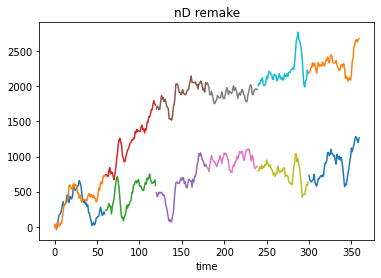

In [4]:
param = {'dim':2, 'Z':12, 'A':500, 'N':10000, 'L':60, 'DX':50, 'bias':5 }

x, y = create_dataset(**param)
Show_data(x,60,"nD remake", nsegments=6)

In [5]:
# this function takes the dictionary elements and stores them to variables
locals().update(param)
print(f'for example, N is {N}')

for example, N is 10000


### Save data on file

In [6]:
##  WARNING: need a function to save the 3D array! maybe it is better to convert it to 2D:   x.reshape((N*L,dim)) 
#       and then reshape back when you want to use it  -> .reshape((N,L,dim))

!mkdir DATA -p
str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
print(str0)

xr = x.reshape((N*L,dim))  # when you read it back, use  .reshape((N,L,dim))


fname='DATA/x_'+str0
np.savetxt(fname,xr,fmt="%d")
fname='DATA/y_'+str0
np.savetxt(fname,y,fmt="%d")

ts_L60_Z12_A500_DX50_bias5_N10000.dat


### Check that we do not mess up with the data shape

600000 2


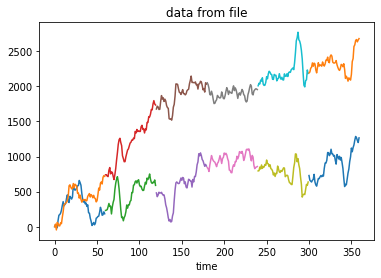

In [7]:
str0 = 'ts_L60_Z12_A500_DX50_bias5_N10000.dat'
fnamex='DATA/x_'+str0


param = {'dim':2, 'Z':12, 'A':500, 'N':10000, 'L':60, 'DX':50, 'bias':5 }
locals().update(param)

x = np.loadtxt(fnamex, delimiter=" ",dtype=float)
print(len(x),len(x[0]))
x = x.reshape((N,L,dim))  # do this when you read the data!

Show_data(x,L,"data from file", nsegments=6)

In [8]:
def saver(x, y, dim=2, Z=12,A=500,N=10000,L=60,DX=50,bias=5):
    str0 = f'ts_L{L}_Z{Z}_A{A}_DX{DX}_bias{bias}_N{N}.dat'
    print(str0, '\n')
    
    fname='DATA/x_'+str0
    np.savetxt(fname,x,fmt="%d")
    fname='DATA/y_'+str0
    np.savetxt(fname,y,fmt="%d")
    return

!mkdir DATA -p

# We probe amplitudes of the injected pattern such that
# the amplitude increases of 100 
#

amplitudes = [i*100 for i in range(1, 11)]
for ampl in amplitudes:
    param = {'dim':2, 'Z':12, 'A':ampl, 'N':10000, 'L':60, 'DX':50, 'bias':5 }
    locals().update(param)
    
    x, y = create_dataset(**param)
    x = x.reshape((N*L,dim))
    
    saver(x, y, **param)

ts_L60_Z12_A100_DX50_bias5_N10000.dat 

ts_L60_Z12_A200_DX50_bias5_N10000.dat 

ts_L60_Z12_A300_DX50_bias5_N10000.dat 

ts_L60_Z12_A400_DX50_bias5_N10000.dat 

ts_L60_Z12_A500_DX50_bias5_N10000.dat 

ts_L60_Z12_A600_DX50_bias5_N10000.dat 

ts_L60_Z12_A700_DX50_bias5_N10000.dat 

ts_L60_Z12_A800_DX50_bias5_N10000.dat 

ts_L60_Z12_A900_DX50_bias5_N10000.dat 

ts_L60_Z12_A1000_DX50_bias5_N10000.dat 



End of part 1.